# Julia Overview

## Contents
- [Primitive Data Types](#Primitive-Data-Types)  
- [Iterating](#Iterating)  
- [Comparisons and Logical Operators](#Comparisons-and-Logical-Operators)  
- [User-Defined Functions](#User-Defined-Functions)  
- [Broadcasting](#Broadcasting)  
- [Scoping and Closures](#Scoping-and-Closures)  
- [Exercises](#Exercises)  
- [Solutions](#Solutions)  

In [22]:
using LinearAlgebra, Statistics, Plots

## Primitive Data Types
간단한 데이터 유형은 'true' 또는 'false'를 표현하는 Bool이 있습니다.

In [23]:
x = true

true

In [24]:
typeof(x)

Bool

In [25]:
y = 1 > 2  # y = false

false

대표적인 2가지 숫자 유형은 '정수'와 '실수' 입니다.

In [26]:
typeof(1.0)

Float64

In [27]:
typeof(1)

Int64

32비트 시스템을 실행 중인 경우 여전히 `Float64`로 표시되지만, 정수의 경우 `Int64` 대신 `Int32`가 표시됩니다([정수 유형에 대한 섹션](https://docs.julialang.org/en/v1.1/manual/integers-and-floating-point-numbers/#Integers-1)을 Julia 공식 사이트에서 참조하세요).

In [28]:
x = 2; y = 1.0;

`;`는 한 줄의 코드에서 출력을 억제하거나 두 줄의 코드를 함께 결합하는 데 사용하는데 주로 사용됩니다

In [39]:
x * y

5 + 0im

In [40]:
x^2

-3 + 4im

In [41]:
y / x

-0.6 - 0.8im

숫자 리터럴과 변수 간의 곱셈에서는 `*`를 생략할 수 있습니다.

In [42]:
2x - 3y

-1 + 10im

`@show`는 식과 결과를 함께 출력하는데 유용합니다.

In [43]:
@show 2x - 3y;
@show x + y;

2x - 3y = -1 + 10im
x + y = 2 + 0im


In [44]:
x = 1 + 2im

1 + 2im

In [45]:
y = 1 - 2im

1 - 2im

In [46]:
x * y  # complex multiplication

5 + 0im

## Strings

In [47]:
x = "foobar"

"foobar"

In [48]:
typeof(x)

String

In [49]:
x = 10; y = 20

20

`\$`는 문자열 보간에 활용됩니다.

In [50]:
"x = $x"

"x = 10"

Julia는 문자열과 관련된 다양한 기능을 제공합니다.

In [51]:
"x + y = $(x + y)"

"x + y = 30"

To concatenate strings use `*`

In [52]:
"foo" * "bar"

"foobar"

Julia는 문자열 작업을 위한 많은 기능을 제공합니다.

In [53]:
s = "Charlie don't surf"

"Charlie don't surf"

In [54]:
split(s)

3-element Vector{SubString{String}}:
 "Charlie"
 "don't"
 "surf"

In [55]:
replace(s, "surf" => "ski")

"Charlie don't ski"

In [58]:
split("fee,fi,fo", ",")

3-element Vector{SubString{String}}:
 "fee"
 "fi"
 "fo"

In [60]:
strip(" foobar ")  # remove whitespace

"foobar"

문자열 검색 및 조작에 관한 자세한 사항은 [regular expressions](https://en.wikipedia.org/wiki/Regular_expression) ([see regular expressions documentation](https://docs.julialang.org/en/v1/manual/strings/#Regular-Expressions-1)을 참고하세요.

In [62]:
match(r"(\d+)", "Top 10")  # 숫자를 검색

RegexMatch("10", 1="10")

## Containers

### Referencing Items

시퀀스 유형의 마지막 요소는 `end` 키워드로 액세스할 수 있습니다.

In [77]:
x = [10, 20, 30, 40]

4-element Vector{Int64}:
 10
 20
 30
 40

In [78]:
x[end]

40

In [79]:
x[end-1]

30

배열 또는 튜플의 여러 요소에 액세스하려면 슬라이스 표기법을 사용할 수 있습니다.

In [80]:
x[1:3]

3-element Vector{Int64}:
 10
 20
 30

In [81]:
x[2:end]

3-element Vector{Int64}:
 20
 30
 40

동일한 슬라이스 표기법이 문자열에서 작동합니다.

In [82]:
"foobar"[3:end]

"obar"

### Tuples

In [63]:
x = ("foo", "bar")
y = ("foo", 2)

("foo", 2)

In [64]:
typeof(x), typeof(y)

(Tuple{String, String}, Tuple{String, Int64})


An immutable value는 메모리에서 해당 값을 변경할 수 없습니다. 그래서 tuples은 재할당을 진행할 수 없습니다(i.e. `x[1] = "test"` would fail). tuples은 괄호와 상관없이 사용할 수 있습니다.

In [65]:
x = "foo", 1

("foo", 1)

In [66]:
function f()
    return "foo", 1
end
f()

("foo", 1)

Tuples can also be unpacked directly into variables.

In [67]:
x = ("foo", 1)

("foo", 1)

In [68]:
word, val = x
println("word = $word, val = $val")

word = foo, val = 1


In [70]:
x = ("foo", 1,)
y = ("foo",) # 튜플을 생성하는 간단한 방법
typeof(x), typeof(y)

(Tuple{String, Int64}, Tuple{String})

### Dictionaries
언급할 가치가 있는 또 다른 컨테이너 유형은 dictionaries입니다.
dictionaries은 항목에 번호가 매겨지는 대신 이름이 지정된다는 점을 제외하면 배열과 같습니다.

In [84]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String, Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [85]:
d["age"]

33

`name`과 `age`를 **keys**라고 하고, 키과 연결된 것을 **values** (in this case `"Frodo"` and `33`)라 하니다. `keys(d)` 와 `values(d)`를 사용해서 접근할 수 있습니다.

## Iterating

### Iterables

In [86]:
actions = ["surf", "ski"]
for action in actions
    println("Charlie doesn't $action")
end

Charlie doesn't surf
Charlie doesn't ski


In [87]:
for i in 1:3
    print(i)
end

123

In [88]:
d = Dict("name" => "Frodo", "age" => 33)

Dict{String, Any} with 2 entries:
  "name" => "Frodo"
  "age"  => 33

In [89]:
keys(d)

KeySet for a Dict{String, Any} with 2 entries. Keys:
  "name"
  "age"

In [90]:
collect(keys(d))

2-element Vector{String}:
 "name"
 "age"

### Looping without Indices

In [91]:
x_values = 1:5

1:5

In [92]:
for x in x_values
    println(x * x)
end

1
4
9
16
25


In [93]:
for i in eachindex(x_values)
    println(x_values[i] * x_values[i])
end

1
4
9
16
25


In [94]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (country, city) in zip(countries, cities)
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


In [95]:
countries = ("Japan", "Korea", "China")
cities = ("Tokyo", "Seoul", "Beijing")
for (i, country) in enumerate(countries)
    city = cities[i]
    println("The capital of $country is $city")
end

The capital of Japan is Tokyo
The capital of Korea is Seoul
The capital of China is Beijing


### Comprehensions

In [96]:
doubles = [ 2i for i in 1:4 ]

4-element Vector{Int64}:
 2
 4
 6
 8

In [97]:
animals = ["dog", "cat", "bird"];   # Semicolon suppresses output

In [98]:
plurals = [ animal * "s" for animal in animals ]

3-element Vector{String}:
 "dogs"
 "cats"
 "birds"

In [99]:
[ i + j for i in 1:3, j in 4:6 ]

3×3 Matrix{Int64}:
 5  6  7
 6  7  8
 7  8  9

In [100]:
[ i + j + k for i in 1:3, j in 4:6, k in 7:9 ]

3×3×3 Array{Int64, 3}:
[:, :, 1] =
 12  13  14
 13  14  15
 14  15  16

[:, :, 2] =
 13  14  15
 14  15  16
 15  16  17

[:, :, 3] =
 14  15  16
 15  16  17
 16  17  18

In [101]:
[ (i, j) for i in 1:2, j in animals]

2×3 Matrix{Tuple{Int64, String}}:
 (1, "dog")  (1, "cat")  (1, "bird")
 (2, "dog")  (2, "cat")  (2, "bird")

In [102]:
[ (num = i, animal = j) for i in 1:2, j in animals]

2×3 Matrix{NamedTuple{(:num, :animal), Tuple{Int64, String}}}:
 (num = 1, animal = "dog")  …  (num = 1, animal = "bird")
 (num = 2, animal = "dog")     (num = 2, animal = "bird")

### Generators

In [103]:
xs = 1:10000
f(x) = x^2
f_x = f.(xs)
sum(f_x)

333383335000

In [ ]:
f_x2 = [f(x) for x in xs]
@show sum(f_x2)
@show sum([f(x) for x in xs]); # still allocates temporary

sum(f_x2) = 333383335000
sum([f(x) for x = xs]) = 333383335000


In [105]:
sum(f(x) for x in xs)

333383335000

In [106]:
using BenchmarkTools
@btime sum([f(x) for x in $xs])
@btime sum(f.($xs))
@btime sum(f(x) for x in $xs);

[ Info: Precompiling BenchmarkTools [6e4b80f9-dd63-53aa-95a3-0cdb28fa8baf]


  3.917 μs (2 allocations: 78.17 KiB)
  4.060 μs (2 allocations: 78.17 KiB)
  3.300 ns (0 allocations: 0 bytes)


## Comparisons and Logical Operators

### Comparisons

In [107]:
x = 1

1

In [108]:
x == 2

false

For “not equal” use `!=` or `≠` (`\ne<TAB>`).

In [109]:
x != 3

true

Julia can also test approximate equality with `≈` (`\approx<TAB>`).

In [110]:
1 + 1E-8 ≈ 1

true

### Combining Expressions

Here are the standard logical connectives (conjunction, disjunction)

In [ ]:
true && false

false

In [ ]:
true || false

true

Remember

- `P && Q` is `true` if both are `true`, otherwise it’s `false`.  
- `P || Q` is `false` if both are `false`, otherwise it’s `true`.  

## User-Defined Functions

### Return Statement

In [ ]:
function f1(a, b)
    return a * b
end

function f2(a, b)
    a * b
end

f2 (generic function with 1 method)

In [116]:
function foo(x)
    if x > 0
        return "positive"
    end
    return "nonpositive"
end

foo (generic function with 1 method)

### Other Syntax for Defining Functions

In [117]:
f(x) = sin(1 / x)

f (generic function with 2 methods)

Let’s check that it works

In [118]:
f(1 / pi)

1.2246467991473532e-16

In [119]:
map(x -> sin(1 / x), randn(3))  # apply function to each element

3-element Vector{Float64}:
 -0.5573899087546227
  0.771493558732343
 -0.6994205928388028

### Optional and Keyword Arguments

In [120]:
f(x, a = 1) = exp(cos(a * x))

f (generic function with 3 methods)

If the argument is not supplied, the default value is substituted.

In [121]:
f(pi)

0.36787944117144233

In [122]:
f(pi, 2)

2.718281828459045

In [123]:
f(x; a = 1) = exp(cos(a * x))  # note the ; in the definition

f(pi; a = 2)

2.718281828459045

In [125]:
a = 2
f(pi; a) # equivalent to f(pi; a = a)

2.718281828459045

In [126]:
nt = (;a = 2, b = 10)
f(pi; nt.a) # equivalent to f(pi; a = nt.a)

2.718281828459045

## Broadcasting

In [128]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for (i, x) in enumerate(x_vec)
    y_vec[i] = sin(x)
end

In [129]:
x_vec = [2.0, 4.0, 6.0, 8.0]
y_vec = similar(x_vec)
for i in eachindex(x_vec)
    y_vec[i] = sin(x_vec[i])
end

In [130]:
y_vec = sin.(x_vec)

4-element Vector{Float64}:
  0.9092974268256817
 -0.7568024953079282
 -0.27941549819892586
  0.9893582466233818

In [131]:
function chisq(k)
    @assert k > 0
    z = randn(k)
    return sum(z -> z^2, z)  # same as `sum(x^2 for x in z)`
end

chisq (generic function with 1 method)

In [132]:
chisq(3)

3.267144069979388

In [133]:
chisq(-2)

LoadError: AssertionError: k > 0

In [134]:
chisq.([2, 4, 6])

3-element Vector{Float64}:
 0.9170821918126786
 2.751192519514051
 3.448623870300631

In [148]:
x = 1.0:1.0:5.0
y = [2.0, 4.0, 5.0, 6.0, 8.0]
z = similar(y)
z .= x .+ y .- sin.(x) # generates efficient code instead of many temporaries

5-element Vector{Float64}:
  2.1585290151921033
  5.090702573174318
  7.858879991940133
 10.756802495307928
 13.958924274663138

A convenience macro for adding broadcasting on every function call is `@.`

In [149]:
@. z = x + y - sin(x)

5-element Vector{Float64}:
  2.1585290151921033
  5.090702573174318
  7.858879991940133
 10.756802495307928
 13.958924274663138

In [138]:
f(a, b) = a + b # bivariate function
a = [1 2 3]
b = [4 5 6]
@show f.(a, b) # across both
@show f.(a, 2); # fix scalar for second

f.(a, b) = [5 7 9]
f.(a, 2) = [3 4 5]


In [150]:
f(x, y) = [1, 2, 3] ⋅ x + y   # "⋅" can be typed by \cdot<tab>
f([3, 4, 5], 2)   # uses vector as first parameter
f.(Ref([3, 4, 5]), [2, 3])   # broadcasting over 2nd parameter, fixing first

2-element Vector{Int64}:
 28
 29

## Scoping and Closures

### Functions

In [151]:
f(x) = x^2  # local `x` in scope

# x is not bound to anything in this outer scope
y = 5
f(y)

25

In [152]:
function g() # scope within the `g` function

    f(x) = x^2 # local `x` in scope

    # x is not bound to anything in this outer scope
    y = 5
    f(y)
end
g() # run the function

25

In [153]:
f(x) = x^2  # local `x` in scope

# x is not bound to anything in this outer scope
x = 5   # a different `x` than the local variable name
f(x)    # calling `f` with `x`

25

In [154]:
f(x; y = 1) = x + y  # `x` and `y` are names local to the `f` function
xval = 0.1
yval = 2
f(xval; y = yval)

2.1

Due to scoping, you could write this as

In [155]:
f(x; y = 1) = x + y  # `x` and `y` are names local to the `f` function
x = 0.1
y = 2
f(x; y) # the type and value of y taken from scope

2.1

In [156]:
xval = 0.1
yval = 2
@show (;x = xval, y = yval)  # named tuple with names `x` and `y`

x = 0.1
y = 2

# create a named tuple with names `x` and `y` local to the tuple
@show (;x = x, y = y)

# better yet
@show (;x, y);

(; x = xval, y = yval) = (x = 0.1, y = 2)
(; x = x, y = y) = (x = 0.1, y = 2)
(; x, y) = (x = 0.1, y = 2)


As you use Julia, you will find that scoping is very natural and that there is no reason to avoid using `x` and `y` in both places.

In fact, it frequently leads to clear code closer to the math when you don’t need to specify intermediaries.

Another example is with broadcasting

In [157]:
f(x) = x^2  # local `x` in scope

x = 1:5     # not an integer

f.(x)       # broadcasts the x^2 function over the vector

5-element Vector{Int64}:
  1
  4
  9
 16
 25

### Closures

In [161]:
f(x, a) = a * x^2

f(1, 0.2)

0.2

In [162]:
a = 0.2
f(x) = a * x^2     # refers to the `a` in the outer scope
f(1)               # univariate function

0.2

In [163]:
function g(a)
    f(x) = a * x^2  # refers to the `a` passed in the function
    f(1)            # univariate function
end
g(0.2)

0.2

In [164]:
function solvemodel(x)
    a = x^2
    b = 2 * a
    c = a + b
    return (;a, b, c)  # note local scope of tuples!
end

solvemodel(0.1)

(a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006)

In [165]:
(;a, b, c) = solvemodel(0.1)
println("a = $a, b = $b, c = $c")

a = 0.010000000000000002, b = 0.020000000000000004, c = 0.030000000000000006


### Higher-Order Functions

In [166]:
twice(f, x) = f(f(x))  # applies f to itself twice
f(x) = x^2
@show twice(f, 2.0)

twice(x -> x^2, 2.0)
a = 5
g(x) = a * x
@show twice(g, 2.0);   # using a closure

twice(f, 2.0) = 16.0
twice(g, 2.0) = 50.0


In [167]:
function multiplyit(a, g)
    return x -> a * g(x) # function with `g` used in the closure
end

f(x) = x^2
h = multiplyit(2.0, f) # returns function which doubles the result
h(2)     # returned function is like any other function

8.0

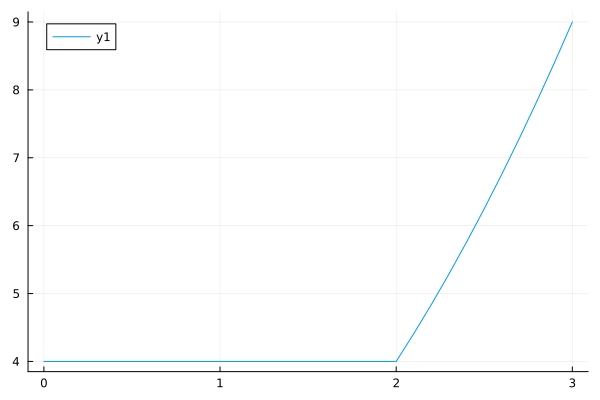

In [168]:
function snapabove2(g, a)
    return x -> x > a ? g(x) : g(a) # returns a closure
end
plot(snapabove2(f, 2.0), 0.0:0.1:3.0)

### Loops

In [169]:
for i in 1:2  # introduces local i
    dval1 = i
    println(i)
end

# @show (i, dval1)  # would fail as neither exists in this scope

for i in 1:2  # introduces a different local i
    println(i)
end

1
2
1
2


In [170]:
dval2 = 0  # introduces variables
for i in 1:2   # introduces local i
    dval2 = i  # refers to outer variable
end

dval2 # still can't refer to `i`

2

Similarly, for while loops

In [171]:
val = 1.0
tol = 0.002
while val > tol
    old = val
    val = val / 2
    difference = val - old
end

@show val;
# @show difference fails, not in scope

val = 0.001953125


### A Quick Check for Scoping Design

In [172]:
x = 2.0
f(y) = x + y
z = f(4.0)

for i in 1:3
    z += i
end

println("z = $z")

z = 12.0


In [173]:
function wrapped()
    x = 2.0
    f(y) = x + y
    z = f(4.0)

    for i in 1:3
        z += i
    end

    println("z = $z")
end

wrapped()

z = 12.0


## Exercises


<a id='pyess-ex1'></a>

### Exercise 1

Part 1: Given two numeric arrays or tuples `x_vals` and `y_vals` of equal length, compute
their inner product using `zip()`.

Part 2: Using a comprehension, count the number of even numbers between 0 and 99.

- Hint: `iseven` returns `true` for even numbers and `false` for odds.  


Part 3: Using a comprehension, take `my_pairs = ((2, 5), (4, 2), (9, 8), (12, 10))` and count the number of pairs `(a, b)` such that both `a` and `b` are even.


<a id='pyess-ex2'></a>

### Exercise 2

Consider the polynomial


<a id='equation-polynom0'></a>
$$
p(x)
= a_0 + a_1 x + a_2 x^2 + \cdots a_n x^n
= \sum_{i=0}^n a_i x^i \tag{3.1}
$$

Using `enumerate()` in your loop, write a function `p` such that `p(x, coeff)` computes the value in [(3.1)](#equation-polynom0) given a point `x` and an array of coefficients `coeff`.


<a id='pyess-ex3'></a>

### Exercise 3

Write a function that takes a string as an argument and returns the number of capital letters in the string.

Hint: `uppercase("foo")` returns `"FOO"`.


<a id='pyess-ex4'></a>

### Exercise 4

Write a function that takes two sequences `seq_a` and `seq_b` as arguments and
returns `true` if every element in `seq_a` is also an element of `seq_b`, else
`false`.

- By “sequence” we mean an array, tuple or string.  



<a id='pyess-ex5'></a>

### Exercise 5

The Julia libraries include functions for interpolation and approximation.

Nevertheless, let’s write our own function approximation routine as an exercise.

In particular, write a function `linapprox` that takes as arguments

- A function `f` mapping some interval $ [a, b] $ into $ \mathbb R $.  
- two scalars `a` and `b` providing the limits of this interval.  
- An integer `n` determining the number of grid points.  
- A number `x` satisfying `a ≤ x ≤ b`.  


and returns the [piecewise linear interpolation](https://en.wikipedia.org/wiki/Linear_interpolation) of `f` at `x`, based on `n` evenly spaced grid points `a = point[1] < point[2] < ... < point[n] = b`.

Aim for clarity, not efficiency.

Hint: use the function `range` to linearly space numbers.

### Exercise 6

The following data lists US cities and their populations.

Copy this text into a text file called `us_cities.txt` and save it in your present working directory.

- That is, save it in the location Julia returns when you call `pwd()`.  


This can also be achieved by running the following Julia code:

In [ ]:
open("us_cities.txt", "w") do f
  write(f,
"new york: 8244910
los angeles: 3819702
chicago: 2707120
houston: 2145146
philadelphia: 1536471
phoenix: 1469471
san antonio: 1359758
san diego: 1326179
dallas: 1223229")
end

Write a program to calculate total population across these cities.

Hints:

- If `f` is a file type then `eachline(f)` provides an iterable that steps you through the lines in the file.  
- `parse(Int, "100")` converts the string `"100"` into an integer.  



<a id='pyess-ex7'></a>

### Exercise 7

Redo Exercise 5 except

1. Pass in a range instead of the `a, b,` and `n`.  Test with a range such as `nodes = -1.0:0.5:1.0`.  
1. Instead of the `while` used in the solution to Exercise 5, find a better way to efficiently bracket the `x` in the nodes.  


Hints:

- Rather than the signature as `function linapprox(f, a, b, n, x)`, it should be called as `function linapprox(f, nodes, x)`.  
- `step(nodes), length(nodes), nodes[1]`, and `nodes[end]` may be useful.  
- Type `?÷` into jupyter to explore quotients from Euclidean division for more efficient bracketing.  

## Solutions

### Exercise 1

Part 1 solution:

Here’s one possible solution

In [ ]:
x_vals = [1, 2, 3]
y_vals = [1, 1, 1]
sum(x * y for (x, y) in zip(x_vals, y_vals))

Part 2 solution:

One solution is

In [ ]:
sum(iseven, 0:99)

Part 3 solution:

Here’s one possibility

In [ ]:
pairs = ((2, 5), (4, 2), (9, 8), (12, 10))
sum(xy -> all(iseven, xy), pairs)

### Exercise 2

In [ ]:
p(x, coeff) = sum(a * x^(i-1) for (i, a) in enumerate(coeff))

In [ ]:
p(1, (2, 4))

### Exercise 3

Here’s one solutions:

In [ ]:
function f_ex3(string)
    count = 0
    for letter in string
        if (letter == uppercase(letter)) && isletter(letter)
            count += 1
        end
    end
    return count
end

f_ex3("The Rain in Spain")

### Exercise 4

Here’s one solutions:

In [ ]:
function f_ex4(seq_a, seq_b)
    is_subset = true
    for a in seq_a
        if a ∉ seq_b
            is_subset = false
        end
    end
    return is_subset
end

# test
println(f_ex4([1, 2], [1, 2, 3]))
println(f_ex4([1, 2, 3], [1, 2]))

if we use the Set data type then the solution is easier

In [ ]:
f_ex4_2(seq_a, seq_b) = Set(seq_a) ⊆ Set(seq_b) # \subseteq (⊆) is unicode for `issubset`

println(f_ex4_2([1, 2], [1, 2, 3]))
println(f_ex4_2([1, 2, 3], [1, 2]))

### Exercise 5

In [ ]:
function linapprox(f, a, b, n, x)
    # evaluates the piecewise linear interpolant of f at x,
    # on the interval [a, b], with n evenly spaced grid points.

    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # find first grid point larger than x
    point = a
    while point ≤ x
        point += step
    end

    # x must lie between the gridpoints (point - step) and point
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)
end

Let’s test it

In [ ]:
f_ex5(x) = x^2
g_ex5(x) = linapprox(f_ex5, -1, 1, 3, x)

In [ ]:
x_grid = range(-1.0, 1.0, length = 100)
y_vals = f_ex5.(x_grid)
y = g_ex5.(x_grid)
plot(x_grid, y_vals, label = "true")
plot!(x_grid, y, label = "approximation")

### Exercise 6

In [ ]:
f_ex6 = open("us_cities.txt", "r")
total_pop = 0
for line in eachline(f_ex6)
    city, population = split(line, ':')  # tuple unpacking
    total_pop += parse(Int, population)
end
close(f_ex6)
println("Total population = $total_pop")